In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from measures import matchY,measures_calculator
import api
imp.reload(api)

import hdbscan
from QuickshiftPP import *
from Spectacl import Spectacl
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [2]:
class DataLoader:
    def __init__(self):
        pass
    
    @classmethod
    def load(self,name):
        if name== 'circles':
            df=pd.read_csv('./artificial_csv/circles_0.1_noise.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='moons':
            df=pd.read_csv('./artificial_csv/moons_0.15_noise.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='impossible':
            df=pd.read_csv('./artificial_csv/impossible_plus.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1].values.astype(np.int)
            return X,Y_true
        
        if name=='s-set':
            df=pd.read_csv('./artificial_csv/s-set1.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true
        
        if name=='smile':
            df=pd.read_csv('./artificial_csv/smile1.csv', header=None)
            X=df.values[:,:2]
            Y_true = df.iloc[:,-1]
            return X,Y_true

In [3]:
X_raw,Y_raw=DataLoader.load('impossible')

In [22]:
from measures import matchY
def remap_label(Y,mapping):
    Y_new = Y.copy()
    for key,value in mapping.items():
        Y_new[Y==key]=value
    return Y_new

In [6]:
idx1 = np.logical_and(X_raw[:,0]<0 , X_raw[:,1]>0)
idx2 = np.logical_and(X_raw[:,0]>0 , X_raw[:,1]>0)
idx3 = np.logical_and(X_raw[:,0]<0 , X_raw[:,1]<0)
idx4 = np.logical_and(X_raw[:,0]>0 , X_raw[:,1]<0)

# group1

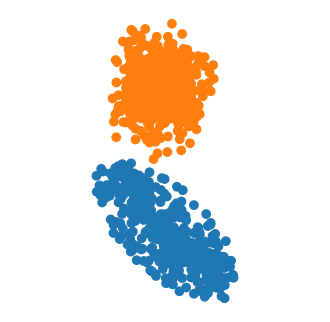

In [30]:
X = X_raw[idx1|idx3]
Y_true = Y_raw[idx1|idx3]
Y_true = remap_label(Y_true,{6:1})
plot_tools.autoPlot(X,Y_true,axis='off',svfile='./figs/raw_data1.png',dpi=100)

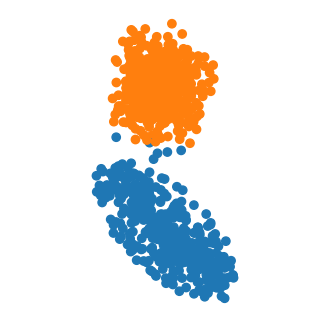

In [31]:
X = X_raw[idx1|idx3]
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=2, epsilon=5).fit_predict(X)
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectACL1.png',dpi=100)

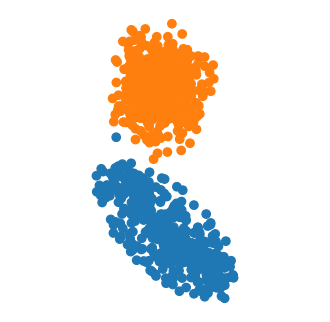

In [32]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=8,
                  target_ratio=[ 1, 1],
                  plot=False,
                 )
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/GIT1.png',dpi=100)

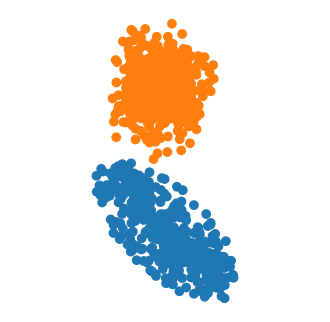

In [33]:
model = QuickshiftPP(k=15,beta=0.7)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/QuickshiftPP1.png',dpi=100)

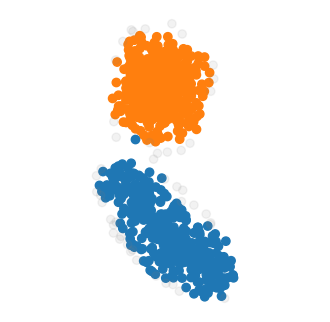

In [34]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=30)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/HDBSCAN1.png',dpi=100)

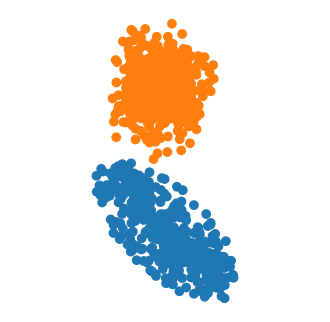

In [35]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/kmeans1.png',dpi=100)

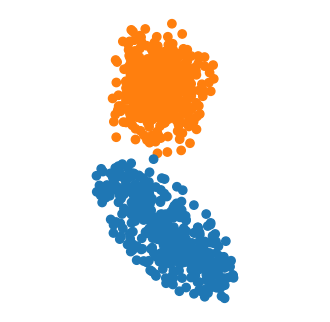

In [36]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
#         n_neighbors=10
        ).fit(X)
Y_pred=clustering.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectral1.png',dpi=100)

# group2

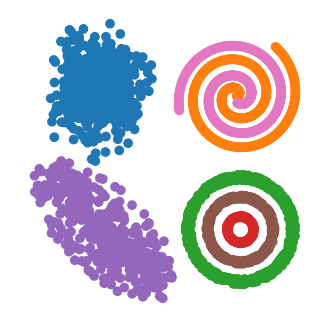

In [15]:
X = X_raw
Y_true = Y_raw
plot_tools.autoPlot(X,Y_true,axis='off',svfile='./figs/raw_data2.png',dpi=100)

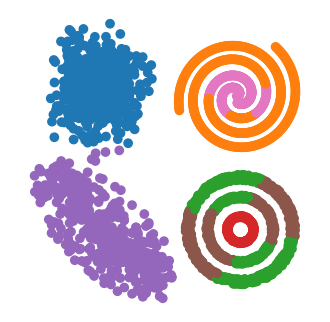

In [23]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=7, epsilon=5).fit_predict(X)
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectACL2.png',dpi=100)

../utils/topo_graph.py:24: OptimizeWarning:

Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.

../utils/topo_graph.py:24: OptimizeWarning:

Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:116: LinAlgWarning:

Ill-conditioned matrix (rcond=1.51493e-17): result may not be accurate.

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/scipy/optimize/_linprog_ip.py:116: LinAlgWarning:

Ill-conditioned matrix (rcond=7.57464e-18): result may not be accurate.

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/scipy/optimize/_linprog_i

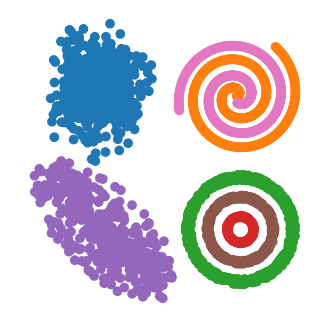

In [24]:
Y_pred,V,E_raw,X_extend,draw_tasks,final_cluster=api.GIT.fit(  X,
                  k=8,
                  target_ratio=[2, 2, 1, 1, 1, 1, 1],
                  plot=False,
                 )
Y_pred, Y_true = matchY(Y_pred,Y_true)
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/GIT2.png',dpi=100)

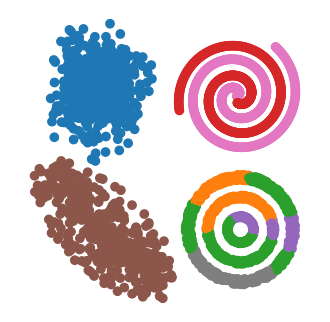

In [26]:
model = QuickshiftPP(k=15,beta=0.7)
model.fit([X[i] for i in range(X.shape[0])])
Y_pred = model.memberships
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/QuickshiftPP2.png',dpi=100)

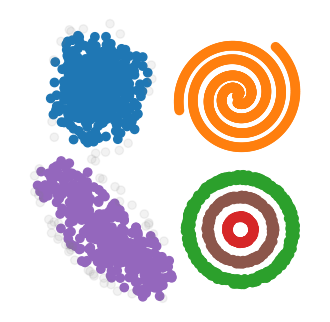

In [27]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=30)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/HDBSCAN2.png',dpi=100)

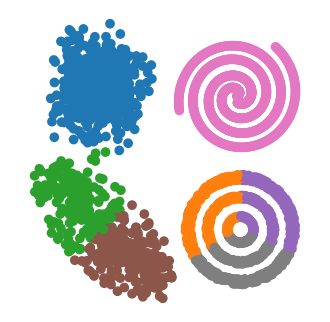

In [28]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
Y_pred = kmeans.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/kmeans2.png',dpi=100)

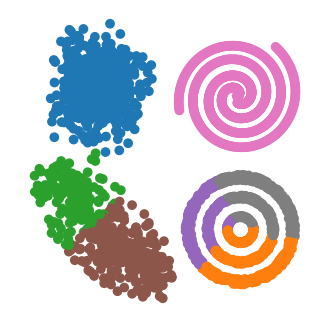

In [29]:
clustering = SpectralClustering(n_clusters=7,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred=clustering.labels_
Y_pred, Y_true = matchY(Y_pred,Y_true)
Y_pred[Y_pred==-2]=Y_pred.max()+1
plot_tools.autoPlot(X,Y_pred,axis='off',svfile='./figs/spectral2.png',dpi=100)